## Name of the dataset
Dataset: Wine Reviews

## Abstract
This dataset describes from the point of view of lots of tasters, how good or bad are some wines, the scale to be good or bad is from 100 to 0 respectively. Also, for each wine described for the taster, the dataset includes some sensitive informations from the wine like country, quick description, price

## Questions to the dataset
Question 1: In the average, which country produces the bests/worsts wines?

Question 2: In the average, which country produces the most expensive/shippest wines?

Question 3: Is the price of the winne affected by it score?

Question 4: In the average, which winery produces the best/worts wine?


## EDA
Present your EDA strategy:
My strategy to answer all the answers and compare it was group the target question (country/winery) and get the mean of the the data. With this in the hand, ask to the data the highest and lowest in each subset.

To my analysis been more realistic, the last question will be considered just wineries that has more than 40 procuded wines, otherwise the mean and histogram can be skewed and the answer not necessarily truthly.

For all answers, the data will be analysed in 3 different ways, using counting by group, the mean of the group, and the distribution of the group, after get the answer, the same analysis will be done to validate the answer

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading Dataset

In [2]:
wine_reviews = pd.read_csv('winemag-data-130k-v2.csv', delimiter = ',', index_col=0)

In [3]:
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
wine_reviews.tail()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [5]:
wine_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [6]:
wine_reviews.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [7]:
(wine_reviews.isnull().sum()/len(wine_reviews))*100

country                   0.048472
description               0.000000
designation              28.825661
points                    0.000000
price                     6.921544
province                  0.048472
region_1                 16.347493
region_2                 61.136715
taster_name              20.192197
taster_twitter_handle    24.015357
title                     0.000000
variety                   0.000769
winery                    0.000000
dtype: float64

In [8]:
wine_reviews.shape

(129971, 13)

In [9]:
wine_reviews.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


### Number of reviews/country

In [10]:
wine_reviews['country'].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Czech Re

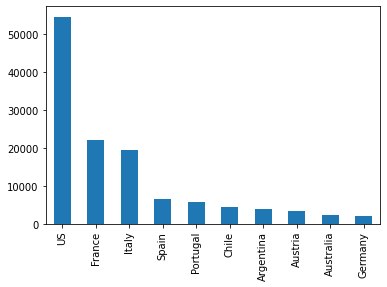

In [11]:
wine_reviews['country'].value_counts().head(10).plot.bar()

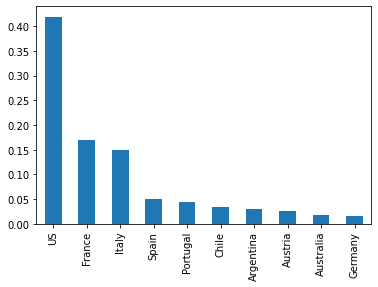

In [12]:
(wine_reviews['country'].value_counts().head(10)/len(wine_reviews)).plot.bar()

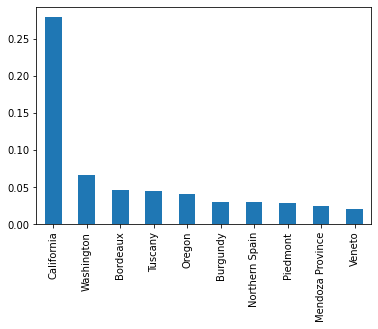

In [13]:
(wine_reviews['province'].value_counts().head(10) / len(wine_reviews)).plot.bar()


### Number of countries

In [14]:
wine_reviews['country'].value_counts().count()

43

### Distribution of Points

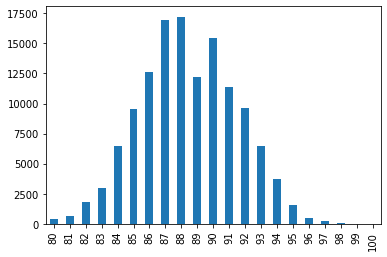

In [15]:
wine_reviews['points'].value_counts().sort_index().plot.bar()

## Question 1: Data pre-processing

In [16]:
wine_avarege_points = wine_reviews.groupby('country')['points'].mean()
wine_avarege_points

country
Argentina                 86.710263
Armenia                   87.500000
Australia                 88.580507
Austria                   90.101345
Bosnia and Herzegovina    86.500000
Brazil                    84.673077
Bulgaria                  87.936170
Canada                    89.369650
Chile                     86.493515
China                     89.000000
Croatia                   87.219178
Cyprus                    87.181818
Czech Republic            87.250000
Egypt                     84.000000
England                   91.581081
France                    88.845109
Georgia                   87.686047
Germany                   89.851732
Greece                    87.283262
Hungary                   89.191781
India                     90.222222
Israel                    88.471287
Italy                     88.562231
Lebanon                   87.685714
Luxembourg                88.666667
Macedonia                 86.833333
Mexico                    85.257143
Moldova             

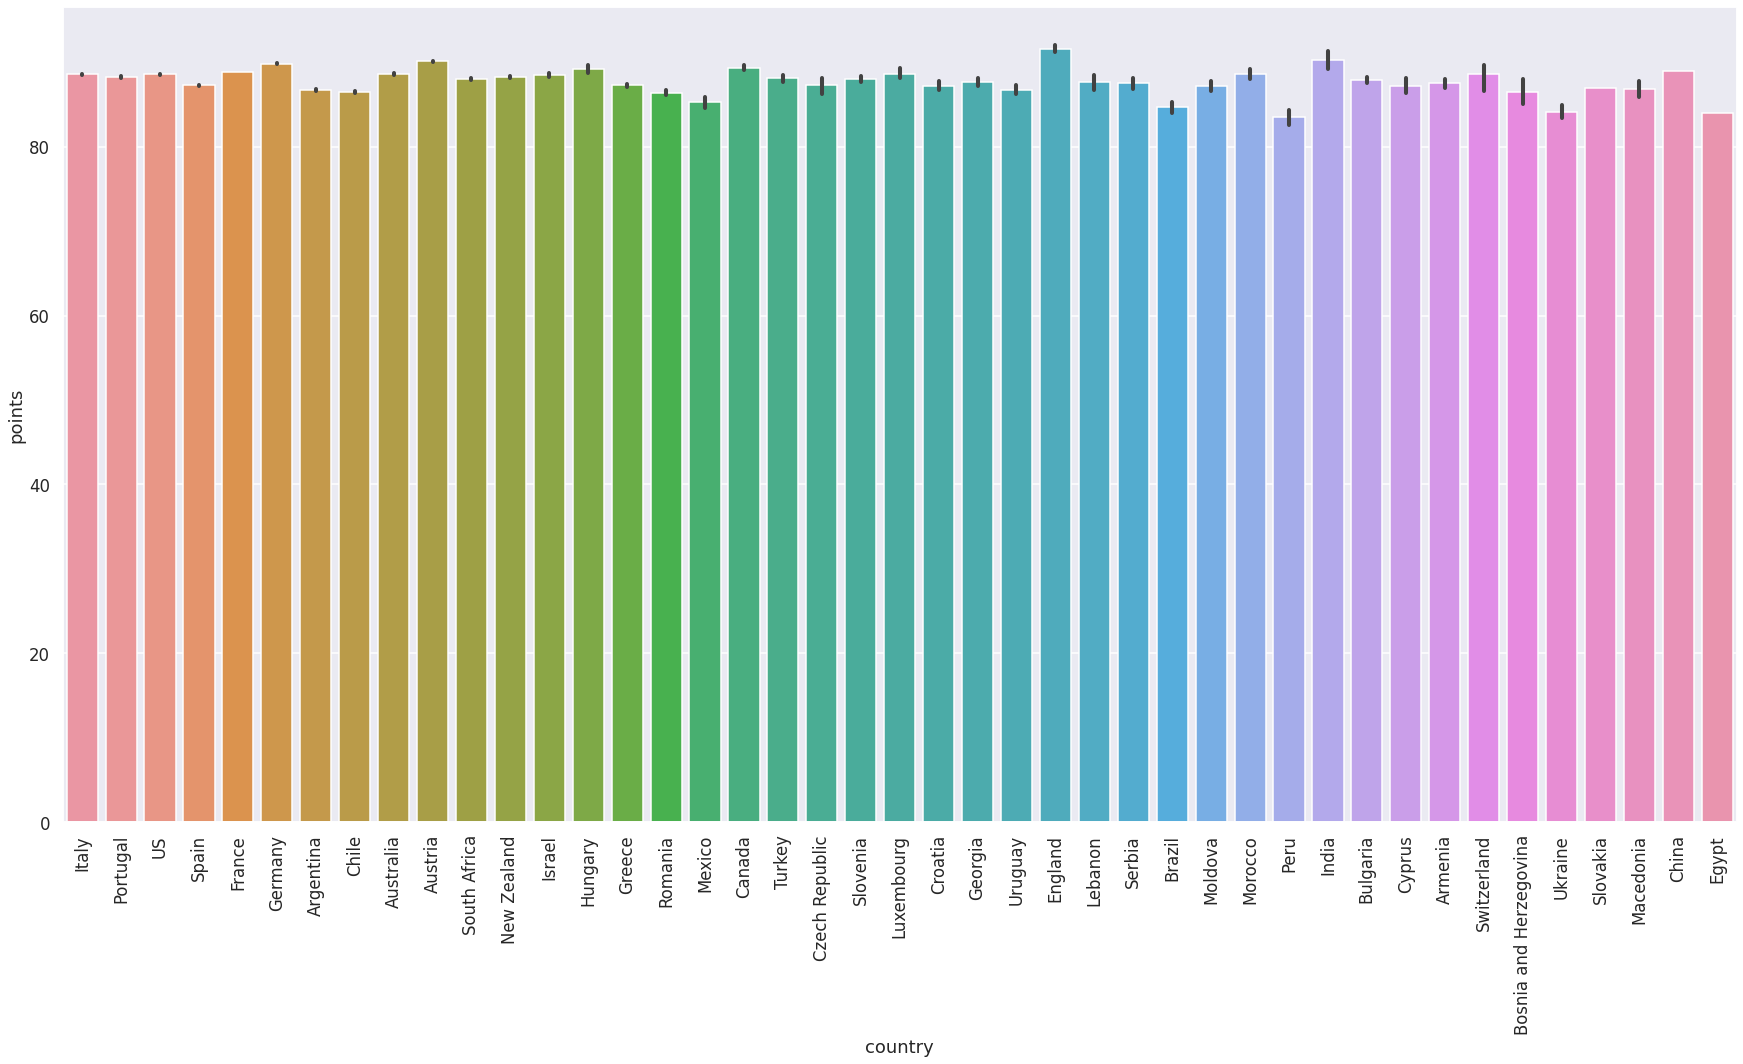

In [17]:
sns.set(color_codes=True)
sns.set_context('talk')
plt.rcParams['figure.figsize'] = (30,15)
plt.xticks(rotation = 90)
sns.barplot(x = wine_reviews['country'], y = wine_reviews['points'], estimator = mean)
plt.show() 

## Question 1a: The country that produces the best wine in the avarege

In [18]:
print(wine_avarege_points.idxmax(), wine_avarege_points.max())

England 91.58108108108108


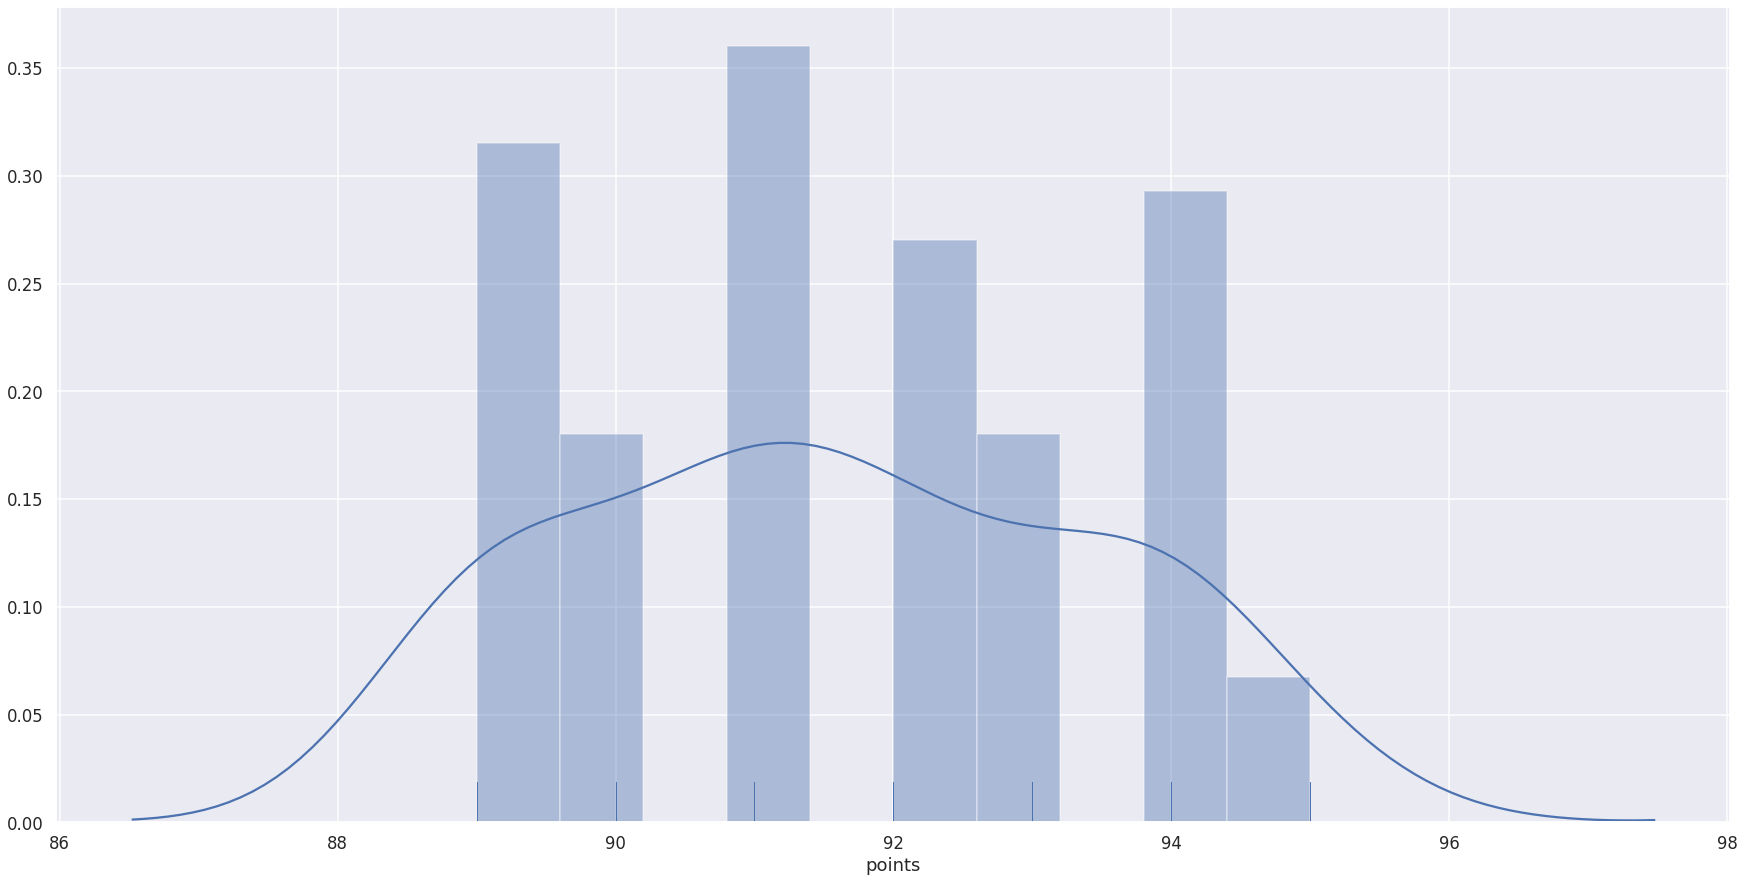

In [19]:
distribution_of_answer = wine_reviews.loc[wine_reviews['country'] == wine_avarege_points.idxmax()]
sns.distplot(distribution_of_answer['points'] ,kde=True, bins=10,rug=True)

In [20]:
distribution_of_answer

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4073,England,A mix of fruity notes immediately hit: white c...,Blanc de Blancs,90,46.0,England,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Ridgeview Estate 2011 Blanc de Blancs Chardonn...,Chardonnay,Ridgeview Estate
6700,England,Crisp green apple flavors are immediately appa...,Cuvée Brut,91,40.0,England,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Wiston Estate Winery 2010 Cuvée Brut Sparkling...,Sparkling Blend,Wiston Estate Winery
9909,England,"Touches of vanilla, cream and lovely hints of ...",Blanc de Blancs,95,70.0,England,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Nyetimber 2010 Blanc de Blancs Chardonnay (Eng...,Chardonnay,Nyetimber
22156,England,Golden color and hints of oatmeal on the nose ...,Three Graces,91,50.0,England,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Chapel Down 2010 Three Graces Sparkling (England),Sparkling Blend,Chapel Down
22369,England,"Pure notes of red apple rise from the glass, p...",Rosé,94,65.0,England,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Nyetimber NV Rosé Sparkling (England),Sparkling Blend,Nyetimber
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124898,England,Creaminess and stone are all that is signalled...,Blanc de Blancs,93,80.0,England,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Gusbourne Estate 2011 Blanc de Blancs Chardonn...,Chardonnay,Gusbourne Estate
124922,England,The nose tells of the crisp green freshness of...,Bolney Bubbly,89,45.0,England,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Bolney Wine Estate NV Bolney Bubbly White (Eng...,White Blend,Bolney Wine Estate
124924,England,There is a flinty touch of reduction on the no...,Cornwall,89,25.0,England,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Camel Valley 2013 Cornwall Sparkling (England),Sparkling Blend,Camel Valley
128098,England,Creamy notes of tart red currant and crisp red...,Leander Pink,89,61.0,England,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Digby Fine English NV Leander Pink Sparkling (...,Sparkling Blend,Digby Fine English


## Question 1b: The country that produces the worst wine in the avarege


In [21]:
print(wine_avarege_points.idxmin(), wine_avarege_points.min())


Peru 83.5625


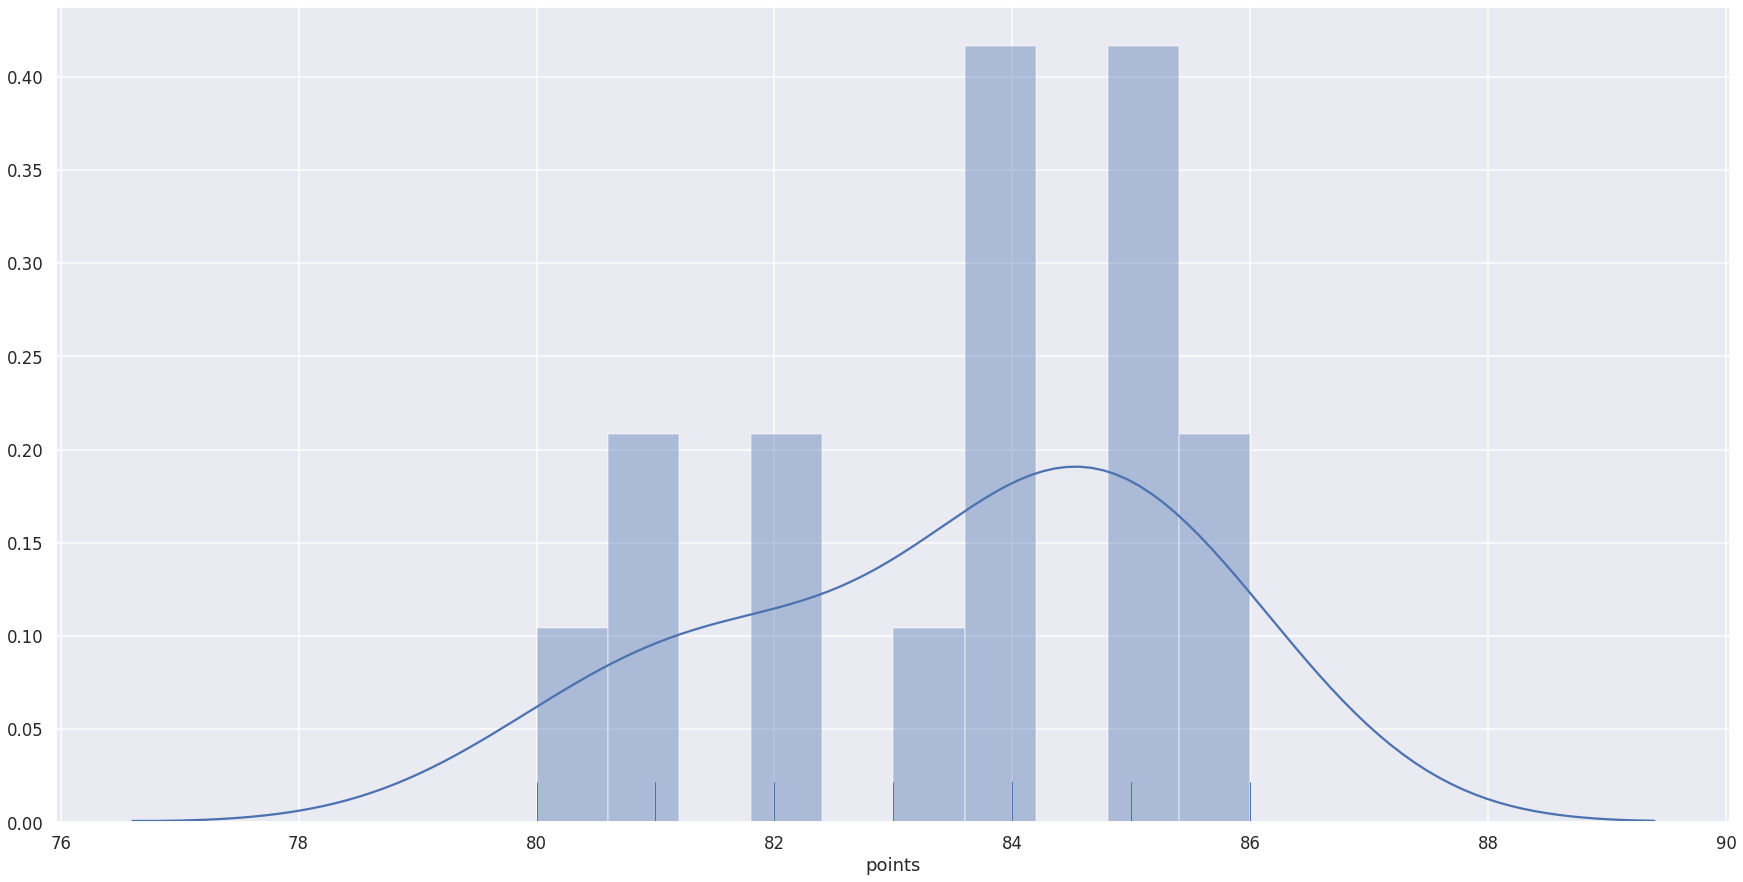

In [22]:
distribution_of_answer = wine_reviews.loc[wine_reviews['country'] == wine_avarege_points.idxmin()]
sns.distplot(distribution_of_answer['points'] ,kde=True, bins=10,rug=True)

In [23]:
distribution_of_answer

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
6565,Peru,Aromas of freshly laid asphalt and char-grille...,Valle del Sol,85,14.0,Ica,NaN,NaN,Michael Schachner,@wineschach,Intipalka 2013 Valle del Sol Tannat (Ica),Tannat,Intipalka
13090,Peru,"Roasted and earthy smelling, with a pinch of i...",Halcón de la Viña,85,15.0,Ica,NaN,NaN,Michael Schachner,@wineschach,Tacama 2008 Halcón de la Viña Malbec (Ica),Malbec,Tacama
14727,Peru,Apple and citrus aromas struggle to hold it to...,Gran Blanco,82,10.0,Ica,NaN,NaN,Michael Schachner,@wineschach,Tacama 2010 Gran Blanco White (Ica),White Blend,Tacama
14732,Peru,"Hot and leathery up front, with stewy notes an...",Gran Tinto,81,10.0,Ica,NaN,NaN,Michael Schachner,@wineschach,Tacama 2009 Gran Tinto Red (Ica),Red Blend,Tacama
23537,Peru,Earthy plum and blackberry aromas are crisp an...,Valle del Sol Reserva,85,17.0,Ica,NaN,NaN,Michael Schachner,@wineschach,Intipalka 2012 Valle del Sol Reserva Malbec-Me...,Malbec-Merlot,Intipalka
37948,Peru,"At first, this blend of Cabernet Sauvignon, Ta...",Valle del Sol No 1 Gran Reserva,85,68.0,Ica,NaN,NaN,Michael Schachner,@wineschach,Intipalka 2010 Valle del Sol No 1 Gran Reserva...,Red Blend,Intipalka
63521,Peru,"Earthy, warm and ripe on the bouquet, with a b...",Sinfonía Tannat-Malbec-Petit Verdot,86,20.0,Ica,NaN,NaN,Michael Schachner,@wineschach,Tacama 2008 Sinfonía Tannat-Malbec-Petit Verdo...,Red Blend,Tacama
64672,Peru,Applesauce aromas are sweet and dusty. Then in...,Semi-Seco Blanco,83,10.0,Ica,NaN,NaN,Michael Schachner,@wineschach,Tacama 2010 Semi-Seco Blanco White (Ica),White Blend,Tacama
79699,Peru,Stone-fruit and yellow apple aromas come with ...,Valle del Sol,82,14.0,Ica,NaN,NaN,Michael Schachner,@wineschach,Intipalka 2014 Valle del Sol Chardonnay (Ica),Chardonnay,Intipalka
79711,Peru,Jammy strawberry and raspberry aromas are lean...,Valle del Sol,81,14.0,Ica,NaN,NaN,Michael Schachner,@wineschach,Intipalka 2013 Valle del Sol Syrah (Ica),Syrah,Intipalka


## Question 2 - Data Pre-Processing

In [24]:
wine_avarege_price = wine_reviews.groupby('country')['price'].mean()
wine_avarege_price=wine_avarege_price.dropna()
wine_avarege_price

country
Argentina                 24.510117
Armenia                   14.500000
Australia                 35.437663
Austria                   30.762772
Bosnia and Herzegovina    12.500000
Brazil                    23.765957
Bulgaria                  14.645390
Canada                    35.712598
Chile                     20.786458
China                     18.000000
Croatia                   25.450704
Cyprus                    16.272727
Czech Republic            24.250000
England                   51.681159
France                    41.139120
Georgia                   19.321429
Germany                   42.257547
Greece                    22.364425
Hungary                   40.648276
India                     13.333333
Israel                    31.768916
Italy                     39.663770
Lebanon                   30.685714
Luxembourg                23.333333
Macedonia                 15.583333
Mexico                    26.785714
Moldova                   16.745763
Morocco             

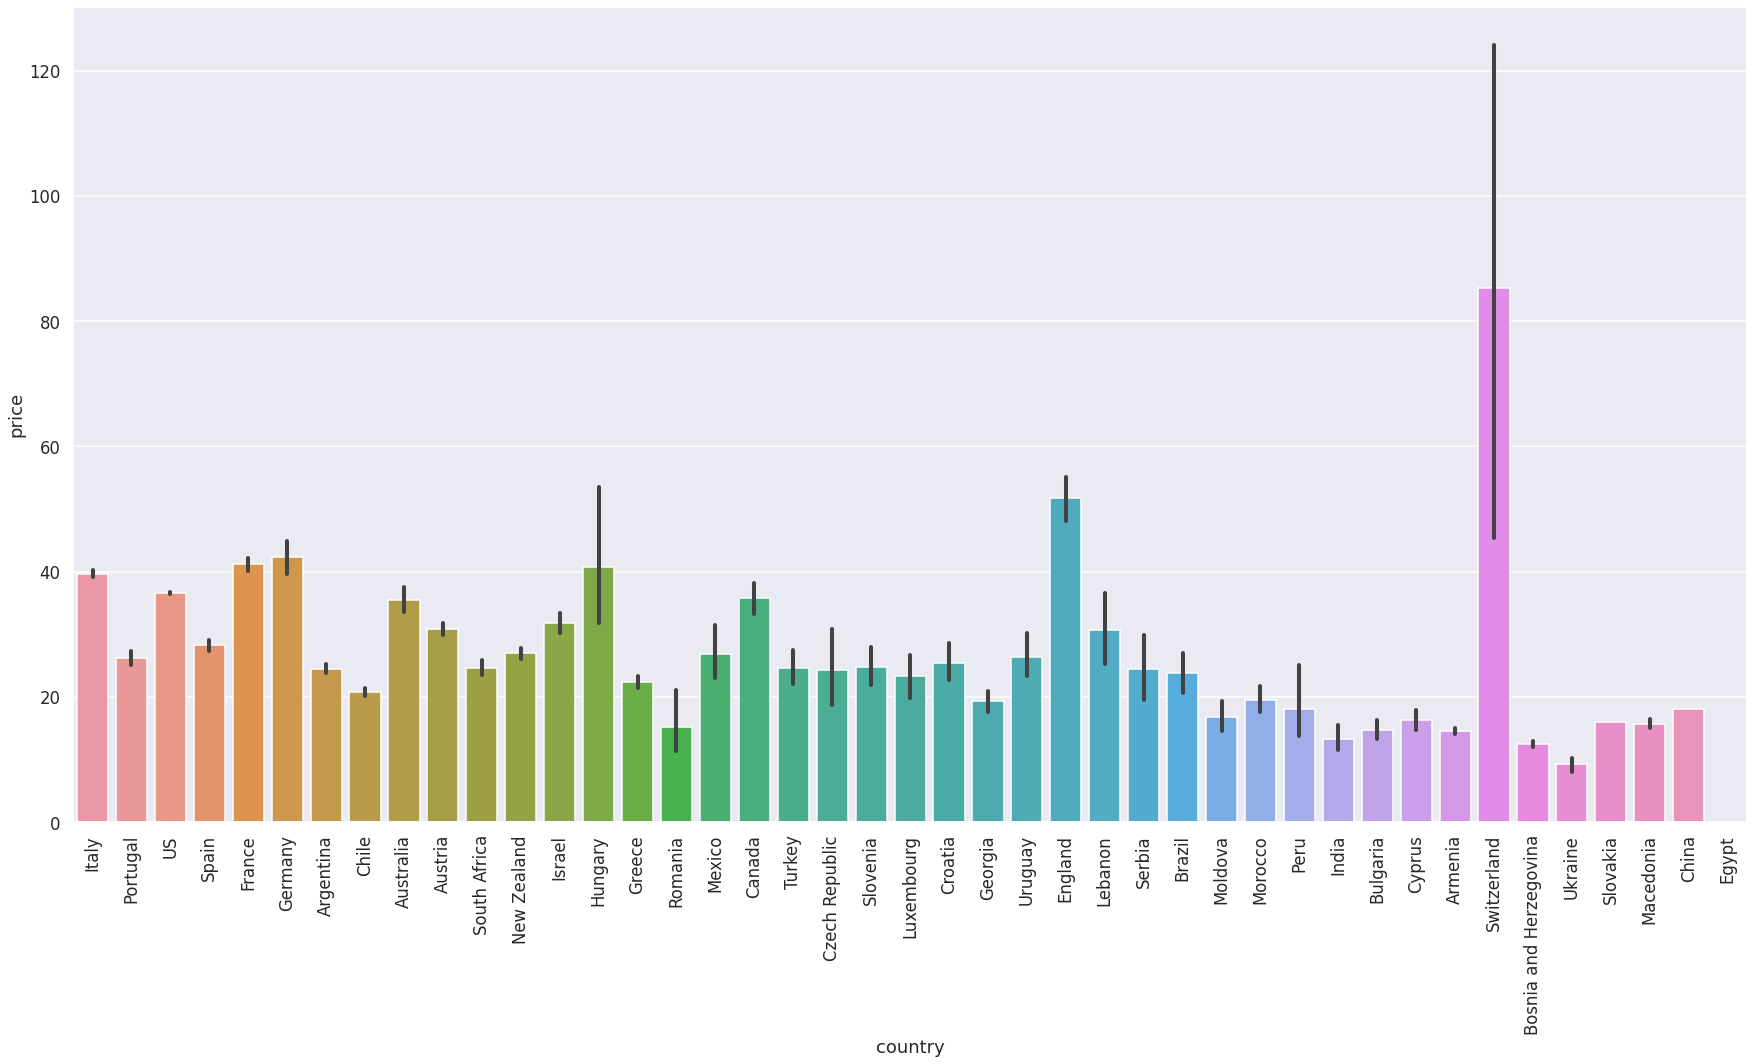

In [25]:
# sns.distplot(wine_avarege_price ,kde=False, bins=20,rug=True)

sns.barplot(x = wine_reviews['country'], y = wine_reviews['price'], estimator = mean)
plt.rcParams['figure.figsize'] = (10,7)
plt.xticks(rotation = 90)
plt.show() 


## Question 2a: The country that produces the most expensive wine in the avarege

In [26]:
print(wine_avarege_price.idxmax(), wine_avarege_price.max())

Switzerland 85.28571428571429


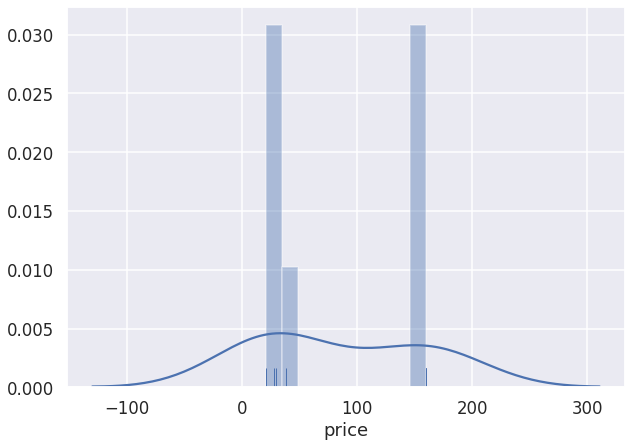

In [27]:
distribution_of_answer = wine_reviews.loc[wine_reviews['country'] == wine_avarege_price.idxmax()]
sns.distplot(distribution_of_answer['price'] ,kde=True, bins=10,rug=True)

In [28]:
distribution_of_answer

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
14187,Switzerland,"A Swiss blend of Pinot Noir and Gamay, this de...",Dôle des Monts,90,30.0,Valais,NaN,NaN,Jeff Jenssen,@worldwineguys,Robert Gilliard 2012 Dôle des Monts Pinot Noir...,Pinot Noir-Gamay,Robert Gilliard
21791,Switzerland,This wine is cherry red with soft brown tinges...,NaN,89,160.0,Switzerland,NaN,NaN,Jeff Jenssen,@worldwineguys,Gantenbein 2011 Pinot Noir (Switzerland),Pinot Noir,Gantenbein
32423,Switzerland,This wine has a bouquet of tart cherry with a ...,NaN,89,160.0,Switzerland,NaN,NaN,Jeff Jenssen,@worldwineguys,Gantenbein 2012 Pinot Noir (Switzerland),Pinot Noir,Gantenbein
50589,Switzerland,"A soft blackberry, vanilla and plum nose is fo...",Carato,83,38.0,Ticino,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Delea 2004 Carato Merlot (Ticino),Merlot,Delea
81814,Switzerland,This wine has a bouquet of tart cherry with a ...,NaN,89,160.0,Switzerland,NaN,NaN,Jeff Jenssen,@worldwineguys,Gantenbein 2012 Pinot Noir (Switzerland),Pinot Noir,Gantenbein
83632,Switzerland,Vanilla and lemon curd aromas bring nuance and...,Les Murettes,90,28.0,Valais,NaN,NaN,Jeff Jenssen,@worldwineguys,Robert Gilliard 2012 Les Murettes Chasselas (V...,Chasselas,Robert Gilliard
129280,Switzerland,The bouquet of this wine shows condensed fruit...,NaN,90,21.0,Neuchâtel,NaN,NaN,Jeff Jenssen,@worldwineguys,Château d'Auvernier 2012 White (Neuchâtel),White Blend,Château d'Auvernier


## Question 2b: The country that produces the shippest wine in the avarege

In [29]:
print(wine_avarege_price.idxmin(), wine_avarege_price.min())

Ukraine 9.214285714285714


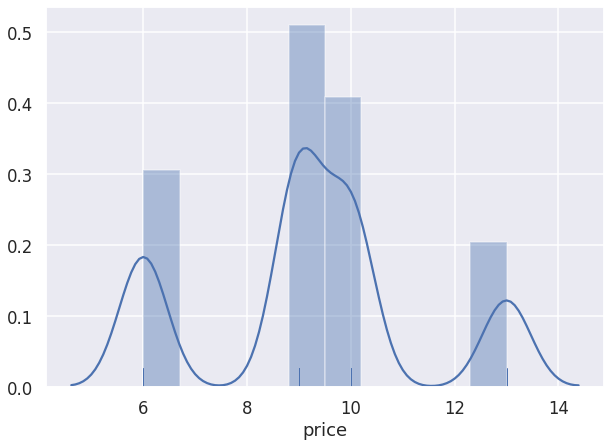

In [30]:
distribution_of_answer = wine_reviews.loc[wine_reviews['country'] == wine_avarege_price.idxmin()]
sns.distplot(distribution_of_answer['price'] ,kde=True, bins=10,rug=True)

In [31]:
distribution_of_answer

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
19530,Ukraine,"On the nose, this nonvintage sparkler from the...",Brut,83,10.0,Ukraine,NaN,NaN,Jeff Jenssen,@worldwineguys,Marengo NV Brut Sparkling (Ukraine),Sparkling Blend,Marengo
36506,Ukraine,Persistent bubbles lead the way to aromas of c...,Semi-Sweet Bianco,83,10.0,Ukraine,NaN,NaN,Jeff Jenssen,@worldwineguys,Marengo NV Semi-Sweet Bianco Sparkling (Ukraine),Sparkling Blend,Marengo
36513,Ukraine,This sparkling rosé has aromas of honeydew mel...,Rose,82,10.0,Ukraine,NaN,NaN,Jeff Jenssen,@worldwineguys,Marengo NV Rose Sparkling (Ukraine),Sparkling Blend,Marengo
36517,Ukraine,This pale lemon sparkling wine has aromas of c...,Semi-Dry,82,10.0,Ukraine,NaN,NaN,Jeff Jenssen,@worldwineguys,Marengo NV Semi-Dry Sparkling (Ukraine),Sparkling Blend,Marengo
44862,Ukraine,This medium-bodied rosé has aromas of strawber...,Semi-Dry,84,6.0,Ukraine,NaN,NaN,Jeff Jenssen,@worldwineguys,Côtnar Hills 2014 Semi-Dry Rosé (Ukraine),Rosé,Côtnar Hills
81079,Ukraine,This ruby-garnet wine has a touch of oxidation...,Reserve,84,9.0,Ukraine,NaN,NaN,Jeff Jenssen,@worldwineguys,Koblevo NV Reserve Merlot (Ukraine),Merlot,Koblevo
87995,Ukraine,This nonvintage red dessert wine is made from ...,Kagor Reserve,85,9.0,Ukraine,NaN,NaN,Jeff Jenssen,@worldwineguys,Koblevo NV Kagor Reserve Bastardo (Ukraine),Bastardo,Koblevo
88511,Ukraine,"This has aromas of white flowers, especially h...",Reserve,88,9.0,Ukraine,NaN,NaN,Jeff Jenssen,@worldwineguys,Koblevo NV Reserve Riesling (Ukraine),Riesling,Koblevo
102754,Ukraine,"The nose is a tad dusty, with hints of unripe ...",KrimSekt White Collection Brut,83,13.0,Ukraine,NaN,NaN,Anna Lee C. Iijima,NaN,Artemovsk 2008 KrimSekt White Collection Brut ...,Sparkling Blend,Artemovsk
108959,Ukraine,This has aromas of citrus blossom and lemon pi...,Reserve,85,9.0,Ukraine,NaN,NaN,Jeff Jenssen,@worldwineguys,Koblevo NV Reserve Chardonnay (Ukraine),Chardonnay,Koblevo


## Question 3 - Data Pre-processing

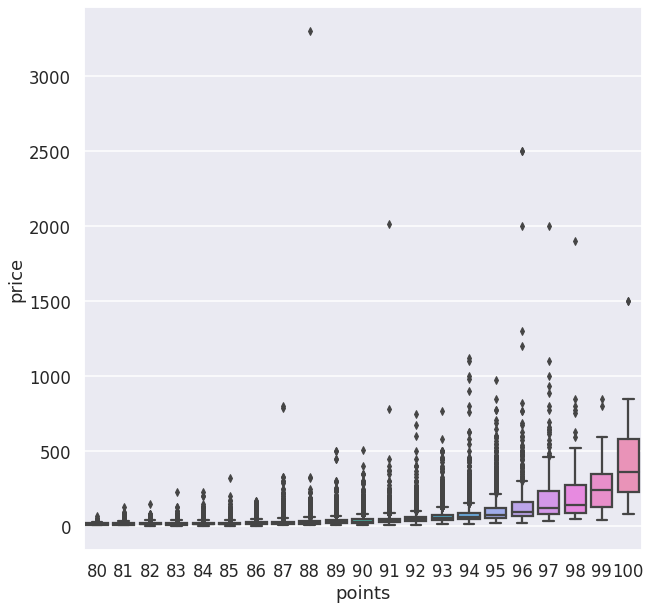

In [32]:
plt.figure(figsize=(10,10))
sns.boxplot(x='points', y='price', data= wine_reviews)

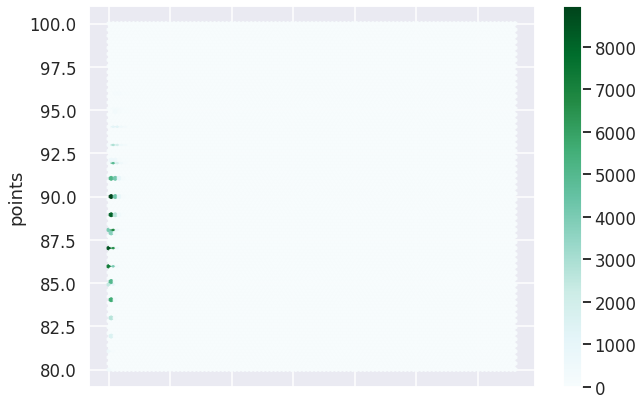

In [33]:
wine_reviews.plot.hexbin(x='price', y='points')

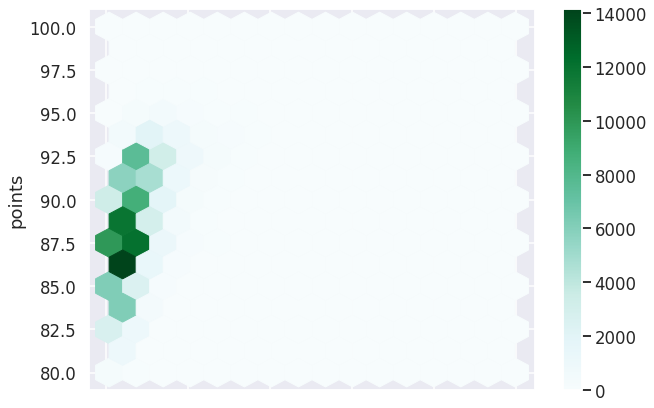

In [34]:
wine_reviews[wine_reviews['price'] < 500].plot.hexbin(x='price', y='points', gridsize=15)

## Question 3: Is the price of the wine affected by the number it score?

Yes, as we can see in the Graph above, as the score increase, the price follows the same trend.

## Question 4 - Data Pre-processing

In [35]:
wine_reviews['winery'].value_counts()

Wines & Winemakers    222
Testarossa            218
DFJ Vinhos            215
Williams Selyem       211
Louis Latour          199
                     ... 
Luigi Giordano          1
Viña Alarba             1
Cantine Riunite         1
Waypoint                1
No BS                   1
Name: winery, Length: 16757, dtype: int64

In [36]:
winery_with_more_than_X = (wine_reviews['winery'].value_counts() > 40)

winery_with_more_than_X = winery_with_more_than_X[winery_with_more_than_X].index.values.tolist()

wine_reviews['winery_with_more_than_X'] = wine_reviews['winery'].apply(lambda x: True if x in winery_with_more_than_X else False)
wine_reviews.sort_values(by=['winery_with_more_than_X'])
wine_reviews_allowed = wine_reviews.loc[wine_reviews['winery_with_more_than_X'] == True]
wine_reviews_allowed

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,winery_with_more_than_X
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,True
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,True
23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,True
35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,True
42,France,"This is a festive wine, with soft, ripe fruit ...",Nouveau,86,9.0,Beaujolais,Beaujolais,NaN,Roger Voss,@vossroger,Henry Fessy 2012 Nouveau (Beaujolais),Gamay,Henry Fessy,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129942,US,This is classic in herbaceous aromas and flavo...,NaN,90,35.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Arrowood 2010 Cabernet Sauvignon (Sonoma County),Cabernet Sauvignon,Arrowood,True
129949,US,There's no bones about the use of oak in this ...,Barrel Fermented,90,35.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs,True
129950,US,This opens with herbaceous dollops of thyme an...,Blocks 7 & 22,90,35.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Hendry 2012 Blocks 7 & 22 Zinfandel (Napa Valley),Zinfandel,Hendry,True
129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano,True


In [37]:
wine_avarege_points_per_winery = wine_reviews_allowed.groupby('winery')['points'].mean()
wine_avarege_points_per_winery=wine_avarege_points_per_winery.dropna()
wine_avarege_points_per_winery

winery
14 Hands                      87.507463
:Nota Bene                    88.126984
Abacela                       88.473684
Abbazia di Novacella          89.377049
Adega Cooperativa de Borba    87.054545
                                ...    
Wölffer                       88.509804
Yalumba                       89.080645
Zaca Mesa                     90.352113
Zenato                        89.219512
Zuccardi                      88.375000
Name: points, Length: 482, dtype: float64

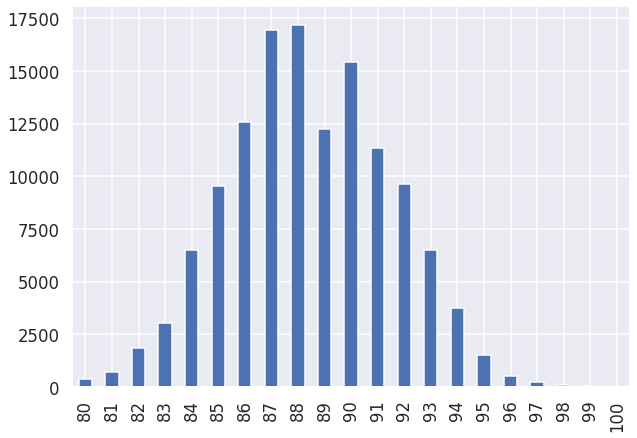

In [38]:
wine_reviews['points'].value_counts().sort_index().plot.bar()

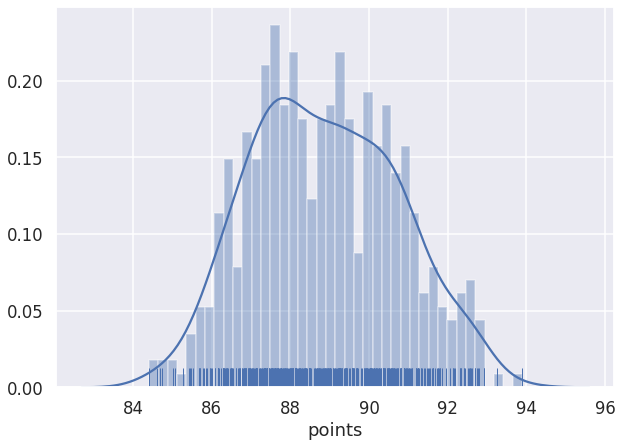

In [39]:
sns.distplot(wine_avarege_points_per_winery ,kde=True, bins=40,rug=True)

## Question 4a: The winery that produces the best wine in the avarege

In [40]:
print(wine_avarege_points_per_winery.idxmax(), wine_avarege_points_per_winery.max())

Cayuse 93.88888888888889


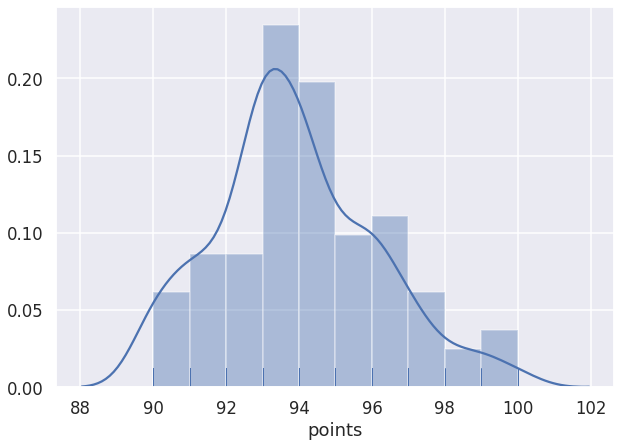

In [41]:
distribution_of_answer = wine_reviews.loc[wine_reviews['winery'] == wine_avarege_points_per_winery.idxmax()]
sns.distplot(distribution_of_answer['points'] ,kde=True, bins=10,rug=True)

In [42]:
distribution_of_answer

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,winery_with_more_than_X
1088,US,"The aromas of this wine leap from the glass, w...",Cailloux Vineyard,94,85.0,Oregon,Walla Walla Valley (OR),Oregon Other,Sean P. Sullivan,@wawinereport,Cayuse 2014 Cailloux Vineyard Syrah (Walla Wal...,Syrah,Cayuse,True
4476,US,"This is an aromatic wine, with vibrant yet sti...",Cailloux Vineyard,91,75.0,Washington,Walla Walla Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Cayuse 2014 Cailloux Vineyard Viognier (Walla ...,Viognier,Cayuse,True
8987,US,This wine smells like moist earth after a rain...,Impulsivo,93,90.0,Washington,Walla Walla Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Cayuse 2012 Impulsivo Tempranillo (Walla Walla...,Tempranillo,Cayuse,True
9608,US,"The 2010 Widowmaker shows a bit more fruit, le...",The Widowmaker En Chamberlin Vineyard,93,85.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Cayuse 2010 The Widowmaker En Chamberlin Viney...,Cabernet Sauvignon,Cayuse,True
13281,US,"Pale copper colored, this wine is more focused...",Edith Grenache Armada Vineyard,90,45.0,Washington,Walla Walla Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Cayuse 2013 Edith Grenache Armada Vineyard Ros...,Rosé,Cayuse,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118967,US,This wine displays a broader fruit profile tha...,Armada Vineyard,95,90.0,Washington,Walla Walla Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Cayuse 2012 Armada Vineyard Syrah (Walla Walla...,Syrah,Cayuse,True
118972,US,"Light in color, this über aromatic wine convey...",Cailloux Vineyard,94,80.0,Washington,Walla Walla Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Cayuse 2012 Cailloux Vineyard Syrah (Walla Wal...,Syrah,Cayuse,True
123545,US,Initially a rather subdued Frog; as if it has ...,Bionic Frog,100,80.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah,Cayuse,True
125255,US,"The aromas are light, with notes of moist eart...",Camaspelo,92,85.0,Oregon,Walla Walla Valley (OR),Oregon Other,Sean P. Sullivan,@wawinereport,Cayuse 2014 Camaspelo Red (Walla Walla Valley ...,Red Blend,Cayuse,True


## Question 4b: The Winery that produces the worst wine in the avarege

In [43]:
print(wine_avarege_points_per_winery.idxmin(), wine_avarege_points_per_winery.min())

Woodbridge by Robert Mondavi 84.4047619047619


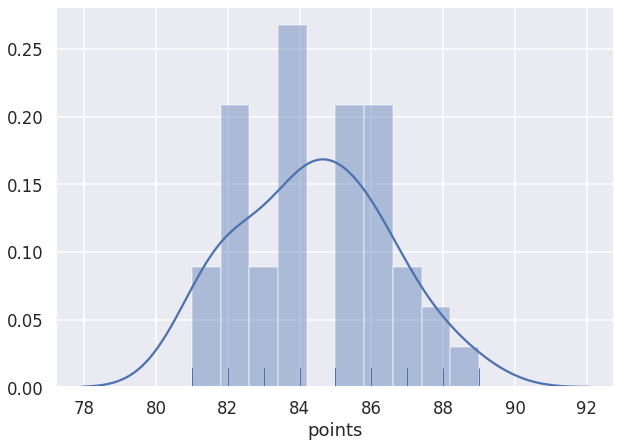

In [44]:
distribution_of_answer = wine_reviews.loc[wine_reviews['winery'] == wine_avarege_points_per_winery.idxmin()]
sns.distplot(distribution_of_answer['points'] ,kde=True, bins=10,rug=True)

In [45]:
distribution_of_answer

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,winery_with_more_than_X
2735,US,A soft fruitiness and smooth texture make this...,NaN,86,8.0,California,California,California Other,Jim Gordon,@gordone_cellars,Woodbridge by Robert Mondavi 2013 Merlot (Cali...,Merlot,Woodbridge by Robert Mondavi,True
3130,US,"At this price, and with a case production of 1...",NaN,83,8.0,California,California,California Other,NaN,NaN,Woodbridge by Robert Mondavi 2012 Zinfandel (C...,Zinfandel,Woodbridge by Robert Mondavi,True
6178,US,Touches of ginger and orange zest lighten up t...,Lightly Oaked,87,8.0,California,California,California Other,Jim Gordon,@gordone_cellars,Woodbridge by Robert Mondavi 2016 Lightly Oake...,Chardonnay,Woodbridge by Robert Mondavi,True
6971,US,"Gentle in texture and generous in flavor, this...",NaN,86,8.0,California,California,California Other,Jim Gordon,@gordone_cellars,Woodbridge by Robert Mondavi 2015 Cabernet Sau...,Cabernet Sauvignon,Woodbridge by Robert Mondavi,True
9082,US,The 2015 vintage is a strong one for Woodbridg...,NaN,89,8.0,California,California,California Other,Jim Gordon,@gordone_cellars,Woodbridge by Robert Mondavi 2015 Pinot Noir (...,Pinot Noir,Woodbridge by Robert Mondavi,True
10568,US,"This wine has a hot-pink color, effusive straw...",White,84,8.0,California,California,California Other,Jim Gordon,@gordone_cellars,Woodbridge by Robert Mondavi 2016 White Zinfan...,Zinfandel,Woodbridge by Robert Mondavi,True
10827,US,This light-bodied wine has aromas of celery an...,NaN,85,8.0,California,California,California Other,Jim Gordon,@gordone_cellars,Woodbridge by Robert Mondavi 2016 Sauvignon Bl...,Sauvignon Blanc,Woodbridge by Robert Mondavi,True
11362,US,"Somewhat watery and simple, this Pinot has ple...",NaN,82,8.0,California,California,California Other,NaN,NaN,Woodbridge by Robert Mondavi 2012 Pinot Noir (...,Pinot Noir,Woodbridge by Robert Mondavi,True
11370,US,This Merlot seems designed for folks who like ...,NaN,81,8.0,California,California,California Other,NaN,NaN,Woodbridge by Robert Mondavi 2012 Merlot (Cali...,Merlot,Woodbridge by Robert Mondavi,True
21784,US,Tastes as sweet as Lifesaver lemon and pineapp...,Lightly Oaked,81,8.0,California,California,California Other,NaN,NaN,Woodbridge by Robert Mondavi 2007 Lightly Oake...,Chardonnay,Woodbridge by Robert Mondavi,True
